In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import layers

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Step 0 || Loss : 492.725830078125
Step 5000 || Loss : 26.415016174316406
Step 10000 || Loss : 26.117528915405273
Step 15000 || Loss : 26.058401107788086
Step 20000 || Loss : 25.9664249420166
Step 25000 || Loss : 25.755638122558594
Step 30000 || Loss : 25.6837100982666
Step 35000 || Loss : 25.676958084106445
Step 40000 || Loss : 25.67261505126953
Step 45000 || Loss : 25.675533294677734


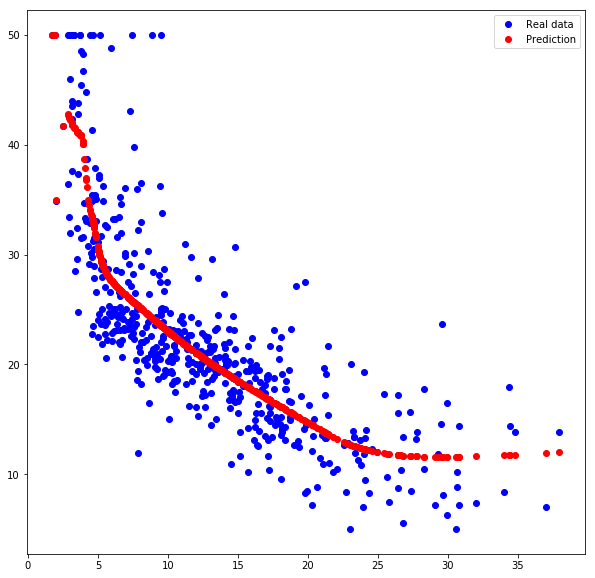

In [2]:
x_data = datasets.load_boston().data[:, 12] # 주변 이웃 중 하위 계층의 비율
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)
_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(y_data), 1])

hidden1 = layers.dense(_x_data, 5, activation=tf.nn.elu)
hidden2 = layers.dense(hidden1, 10, activation=tf.nn.elu)
output = layers.dense(hidden2, 1, activation=None)

loss = tf.losses.mean_squared_error(output, _y_data) 
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))
    output = sess.run(output) 
    
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

#### + Appendix (try other activation functions & gradient descent methods)

In [3]:
for name in dir(tf.nn):
    if 'elu' in name.lower():
        print(name)

crelu
elu
leaky_relu
quantized_relu_x
relu
relu6
relu_layer
selu


In [4]:
for name in dir(tf.train):
    if 'Opti' in name:
        print(name)

AdadeltaOptimizer
AdagradDAOptimizer
AdagradOptimizer
AdamOptimizer
FtrlOptimizer
GradientDescentOptimizer
MomentumOptimizer
Optimizer
ProximalAdagradOptimizer
ProximalGradientDescentOptimizer
RMSPropOptimizer
SyncReplicasOptimizer
